# Frekvencijski spektar
## Sinusni signal
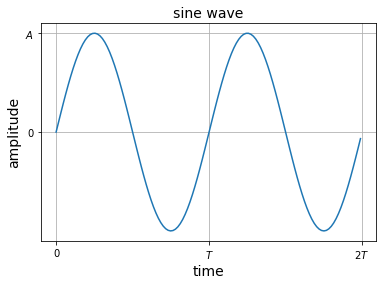
Spektar sinusnog signala sadrži samo komponentu osnovnog harmonika c[1]=$A$. Srednja vrijednost sinusnog signala prikazanog slikom jednaka je 0, pa je time c[0]=0. 

In [1]:
def sine_spectra(A,T,unit):    
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 1):
            c[n] = A
        else:
            c[n] = 0
    
    # RMS output of spectral components
    for n in range(len(c)):
        c[n] = c[n]/np.sqrt(2)
    
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(np.abs(c[n])/1e-3)
            if c[n] < 0:
                c[n] = 0        
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(np.abs(c[n])/1e-6)
            if c[n] < 0:
                c[n] = 0                
        return c,f

## Trapezni signal
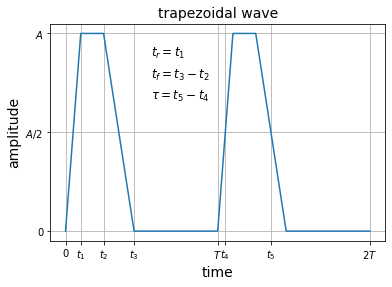

Komponente spektra uz $t_r=t_f$ računaju se prema sljedećim formulama (Paul 2006):

\begin{equation*}
c[0] = \frac{A\tau}{T}
\end{equation*}


\begin{equation*}
c[n] = \frac{2A\tau}{T}\left | \frac{\sin(n\pi\tau/T)}{n\pi\tau/T}\right | \left | \frac{\sin(n\pi t_r /T)}{n\pi t_r /T} \right |,
\end{equation*}
gdje c[0] predstavlja amplitudu DC komponente, c[1] amplitudu osnovne frekvencije, a npr. c[4] predstavlja amplitudu 4. harmonika frekvencijskog spektra. Ovojnica spektra trapeznog signala računa se prema formuli
\begin{equation*}
20\log(envelope)=20\log(\frac{2A\tau}{T}) + 20\log(\left | \frac{\sin(n\pi\tau/T)}{n\pi\tau/T}\right |) + 20\log(\left | \frac{\sin(n\pi t_r /T)}{n\pi t_r /T} \right |)
\end{equation*}
Ovojnica spektra trokutnog signala ima dvije kaakteristične frekvencije:
- prve karakteristična frekvencija $f_1=1/\pi \tau$, spektar opada s -20 dB/dek,
- druga karakteristična frekvencija $f_2=1/\pi t_r$, spektar opada s -40 dB/dek. 

Snaga sadržana u signalu računa se prema sljedećoj jednadžbi,
\begin{equation*}
P=c[0]^2+\frac{1}{2}c[1]^2+\frac{1}{2}c[2]^2+\frac{1}{2}c[3]^2+...
\end{equation*}

In [2]:
def trap_spectra(A,T,tau,tr,unit):
    # calculation of spectra components
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 0):
            c[n] = A*(tau/T)
        else:
            sinx_x1 = np.sin((n)*np.pi*tau/T)/((n)*np.pi*tau/T)
            sinx_x2 = np.sin((n)*np.pi*tr/T)/((n)*np.pi*tr/T)
            c[n] = 2*A*(tau/T)*sinx_x1*sinx_x2                     
            
    # RMS output of spectral components
    for n in range(len(c)):
        c[n] = c[n]/np.sqrt(2)              
            
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(np.abs(c[n])/1e-3)
            if c[n] < 0:
                c[n] = 0        
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(np.abs(c[n])/1e-6)
            if c[n] < 0:
                c[n] = 0                
        return c,f

def envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax):    
    # from fmin to 1/(pi*tau)
    temp1 = np.linspace(fmin, 1/(np.pi*tau), num=100)
    temp2 = np.empty((0, 100))   
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 2*A*tau/T) 
        
    fx = temp1    
    envelope = temp2
    
    # from 1/(pi*tau) to 1/(pi*tr)
    temp1 = np.linspace(1/(np.pi*tau), 1/(np.pi*tr), num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*20)
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))

    # from 1/(pi*tr) to fmax
    temp1 = np.linspace(1/(np.pi*tr), fmax, num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*40)    
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))
    
    # RMS output of envelope
    for n in range(len(envelope)):
        envelope[n] = envelope[n]/np.sqrt(2)        
          
    if (unit == '[V]'):
        return envelope,fx
    elif (unit == '[dBmV]'):
        return 20*np.log10(np.asarray(envelope)/1e-3),np.asarray(fx)
    elif (unit == '[dBuV]'):
        return 20*np.log10(np.asarray(envelope)/1e-6),np.asarray(fx)

## Trokutni signal
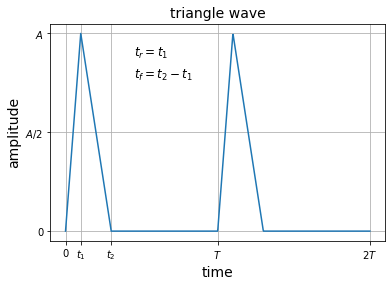
Spektar trokutnog signala dobije se kao poseban slučaj trapeznog, tj. kada je $\tau=t_r=t_f$. U izračunu se podešava samo vrijeme porasta $t_r$ (ne podešava se $\tau$). Ovojnica spektra trapeznog signala ima samo jednu karakterističnu frekvenciju $f_1=1/\pi t_r$ nakon koje spektar opada s -40 dB/dek. 

In [3]:
def isotriangle_spectra(A,T,tr,unit):
    # calculation of spectra components
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 0):
            c[n] = 0.5*A
        else:
            nom1 = np.sin((n)*np.pi*tr/T)
            den1 = (n)*np.pi*tr/T 
            c[n] = 2*A*(tr/T)*(nom1/den1)**2 
            
    # RMS output of spectral components
    for n in range(len(c)):
        c[n] = c[n]/np.sqrt(2)            
                    
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(np.abs(c[n])/1e-3)
            if c[n] < 0:
                c[n] = 0        
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(np.abs(c[n])/1e-6)
            if c[n] < 0:
                c[n] = 0                
        return c,f
    
def envelope_isotriangle_spectra(A,T,tr,unit,fmin,fmax):    
    # from fmin to 1/(pi*tr)
    temp1 = np.linspace(fmin, 1/(np.pi*tr), num=100)
    temp2 = np.empty((0, 100))   
    for i in range(len(temp1)):
        nom1 = np.sin(np.pi*tr/T)
        den1 = np.pi*tr/T
        c = 2*A*(tr/T)*np.abs(nom1/den1)**2        
        temp2 = np.append(temp2, c) 
        
    fx = temp1    
    envelope = temp2
    
    # from 1/(pi*tr) to fmax
    temp1 = np.linspace(1/(np.pi*tr), fmax, num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*40)    
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))
    
    # RMS output of envelope
    for n in range(len(envelope)):
        envelope[n] = envelope[n]/np.sqrt(2)    
          
    if (unit == '[V]'):
        return envelope,fx
    elif (unit == '[dBmV]'):
        return 20*np.log10(np.asarray(envelope)/1e-3),np.asarray(fx)   
    elif (unit == '[dBuV]'):
        return 20*np.log10(np.asarray(envelope)/1e-6),np.asarray(fx)    

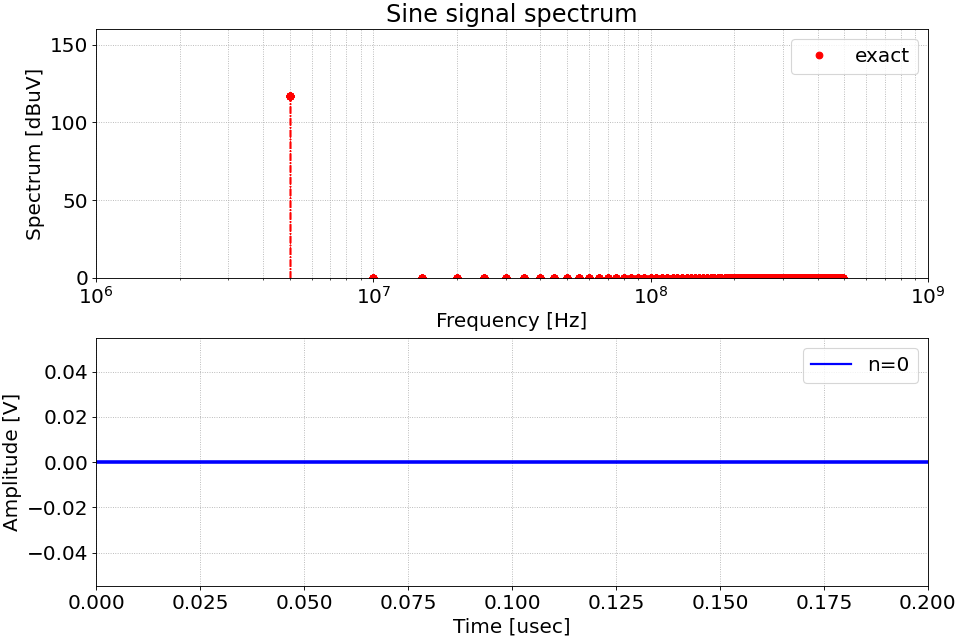

In [9]:
%matplotlib widget
from ipywidgets import Layout
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

output = widgets.Output()

# no of spectra coefficients
noC = 100

option1 = 'sine signal'
option2 = 'trapezoidal signal'
option3 = 'triangle signal'
option4 = 'AC only'
option5 = 'DC + AC'

style = {'description_width': '150px'}
fmin = widgets.FloatLogSlider(min=1, max=6, step=1, value=1e6,description='$f_{min}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
fmax = widgets.FloatLogSlider(min=7, max=10, step=1, value=1e9,description='$f_{max}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
ymin = widgets.IntSlider(min=0,max=100, step=1, value=0,description='plot $y_{min}$:',readout_format='.4f',style=style,layout=Layout(width='75%'), continuous_update=False)
ymax = widgets.IntSlider(min=1,max=200, step=1, value=160,description='plot $y_{max}$:',readout_format='.1f',style=style,layout=Layout(width='75%'), continuous_update=False)
bunit = widgets.ToggleButtons(options=['[dBuV]', '[dBmV]', '[V]'], description='Unit:',disabled=False,button_style='',style=style,layout=Layout(width='75%'), continuous_update=False)

sA = widgets.FloatSlider(min=1, max=400, step=1, value=1,description='A [V]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tA = widgets.Text(value='1',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
def text_change1(change):
    if float(change.new) < sA.min:
        sA.min = float(change.new)
    if float(change.new) > sA.max:
        sA.max = float(change.new)
    sA.value = float(change.new)
tA.observe(text_change1, names='value')

sT = widgets.FloatSlider(min=0.01, max=20, step=0.01, value=0.2,description='T [usec]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tT = widgets.Text(value='0.2',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
def text_change2(change):
    if float(change.new) < sT.min:
        sT.min = float(change.new)
    if float(change.new) > sA.max:
        sT.max = float(change.new)
    sT.value = float(change.new)
tT.observe(text_change2, names='value')

stau = widgets.FloatSlider(min=0.001,max=20,step=0.01, value=0.1,description='$\\tau$ [usec]:',style=style,layout=Layout(width='75%'), continuous_update=False)
ttau = widgets.Text(value='0.1',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
def text_change3(change):
    if float(change.new) < stau.min:
        stau.min = float(change.new)
    if float(change.new) > sA.max:
        stau.max = float(change.new)
    stau.value = float(change.new)
ttau.observe(text_change3, names='value')

sstr = widgets.FloatSlider(min=0.001,max=100,step=0.01, value=1,description='$t_r$ [nsec]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tstr= widgets.Text(value='1',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
def text_change4(change):
    if float(change.new) < sstr.min:
        sstr.min = float(change.new)
    if float(change.new) > sA.max:
        sstr.max = float(change.new)
    sstr.value = float(change.new)
tstr.observe(text_change4, names='value')

scoeff = widgets.IntSlider(value=0,min=0,max=noC-1,step=1,description='coeff. no.:',style=style,layout=Layout(width='75%'), continuous_update=False)

tcoeff = widgets.Text(value='',placeholder='-',description='RMS coeff. value:',style=style,layout=Layout(width='75%'))
twarn = widgets.Text(value='',placeholder='-',description='msg:',style=style,layout=Layout(width='75%'))

rb1 = widgets.RadioButtons(options=[option1,option2,option3], description='',style=style,layout=Layout(width='75%'))
rb2 = widgets.RadioButtons(options=[option4,option5], description='',style=style,layout=Layout(width='75%'))

tc0 = widgets.Text(value='',placeholder='-',description='c[0]:',style=style,layout=Layout(width='75%'))
tc1 = widgets.Text(value='',placeholder='-',description='c[1]:',style=style,layout=Layout(width='75%'))
tc2 = widgets.Text(value='',placeholder='-',description='c[2]:',style=style,layout=Layout(width='75%'))
tc3 = widgets.Text(value='',placeholder='-',description='c[3]:',style=style,layout=Layout(width='75%'))
tc4 = widgets.Text(value='',placeholder='-',description='c[4]:',style=style,layout=Layout(width='75%'))
tc5 = widgets.Text(value='',placeholder='-',description='c[5]:',style=style,layout=Layout(width='75%'))
tc6 = widgets.Text(value='',placeholder='-',description='c[6]:',style=style,layout=Layout(width='75%'))
tc7 = widgets.Text(value='',placeholder='-',description='c[7]:',style=style,layout=Layout(width='75%'))
tc8 = widgets.Text(value='',placeholder='-',description='c[8]:',style=style,layout=Layout(width='75%'))
tc9 = widgets.Text(value='',placeholder='-',description='c[9]:',style=style,layout=Layout(width='75%'))
tc10 = widgets.Text(value='',placeholder='-',description='c[10]:',style=style,layout=Layout(width='75%'))

sumtc0 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtc1 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtc2 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtc3 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtc4 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtc5 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtc6 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtc7 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtc8 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtc9 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtc10 = widgets.Text(value='',placeholder='-',description='%:',style=style,layout=Layout(width='75%'))
sumtctot = widgets.Text(value='',placeholder='-',description='TOTAL [W]:',style=style,layout=Layout(width='75%'))

plt.rcParams.update({'font.size': 18})
fig1, (axes1, axes2) = plt.subplots(2, 1, figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k',constrained_layout=True)

axes1.set_xscale("log")
axes1.set_yscale("linear") 
axes1.set_xlabel('Frequency [Hz]')

axes2.set_xscale("linear")
axes2.set_yscale("linear") 
axes2.set_xlabel('Time [usec]')

def func1(fmin, fmax, ymin, ymax, unit, A, T, tau, tr, rrb1, rrb2, coeff, t1, t2,  
          tcc0, tcc1, tcc2, tcc3, tcc4, tcc5, tcc6, tcc7, tcc8, tcc9, tcc10,
          scc0, scc1, scc2, scc3, scc4, scc5, scc6, scc7, scc8, scc9, scc10, sctot): 
    
    npts = 100        
    T = T/1e6
    tau = tau/1e6
    tr = tr/1e9  
    
    axes1.set_ylabel('Spectrum '+unit)
    axes1.set_ylim(bottom = ymin, top = ymax)  
    axes1.set_xlim(left = fmin, right = fmax)               
    axes1.grid(True,which="both",ls=":")
    
    axes2.set_ylabel('Amplitude [V]')    
    ###axes2.set_ylim(bottom = ymin, top = ymax)  
    axes2.set_xlim(left = 0, right = T*1e6)                           
    axes2.grid(True,which="both",ls=":")    
    
    lines_to_delete = axes1.get_lines()
    for i in lines_to_delete:
        i.remove()
    for i in axes1.collections:
        i.remove() 
        
    lines_to_delete = axes2.get_lines()
    for i in lines_to_delete:
        i.remove()
    for i in axes2.collections:
        i.remove()         
        
    if (rrb1 == option2):
        axes1.set_title('Trapezodial signal spectrum')
        
        c,f1 = trap_spectra(A,T,tau,tr,'[V]')         
        sumc = 0
        for i in range(len(c)):
            if (i == 0):
                if (rrb2 == option5):
                    sumc = sumc + c[i]**2
            else:
                sumc = sumc + 0.5*c[i]**2         
        sumtctot.value = str(sumc)         
        
        if (rrb2 == option4): # only AC
            sumtc0.value = '-'                       
        else:
            sumtc0.value = str(round(100*c[0]**2/sumc,2))
        sumtc1.value = str(round(100*0.5*c[1]**2/sumc,2))
        sumtc2.value = str(round(100*0.5*c[2]**2/sumc,2))
        sumtc3.value = str(round(100*0.5*c[3]**2/sumc,2))
        sumtc4.value = str(round(100*0.5*c[4]**2/sumc,2))
        sumtc5.value = str(round(100*0.5*c[5]**2/sumc,2))
        sumtc6.value = str(round(100*0.5*c[6]**2/sumc,2))
        sumtc7.value = str(round(100*0.5*c[7]**2/sumc,2))
        sumtc8.value = str(round(100*0.5*c[8]**2/sumc,2))
        sumtc9.value = str(round(100*0.5*c[9]**2/sumc,2))
        sumtc10.value =str(round(100*0.5*c[10]**2/sumc,2))     
        
        #if (rrb2 == option4): # only AC
        #    sumtc0.value = '-'
        
        time = np.linspace(0, T, npts)
        signal = []
        for i in range(int(coeff)+1):
            if i == 0:                
                signal = c[i]*np.ones(npts)
            else:
                rad = np.linspace(0, i*2*np.pi, npts)
                phase = i*np.pi*(tau+tr)/T               
                signal = signal + c[i]*np.cos(rad+phase)                    
        line, = axes2.plot(time*1e6, signal, lw=2, color='blue')            
        
        c,f1 = trap_spectra(A,T,tau,tr,unit)          
        envelope,f2 = envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax)        
        if (T < tau + tr):                
            twarn.value = 'T < tau + tr !!!'
        else:
            twarn.value = 'parameters ok!!!!' + '; f1 = '+"{0:.2f}".format(1e-6/(np.pi*tau))+' MHz' + '; f2 = '+"{0:.2f}".format(1e-6/(np.pi*tr))+' MHz'                                        
        markerline, stemline, baseline = axes1.stem(f1, c, '-.',label='exact',use_line_collection=True)
        line, = axes1.plot(f2, envelope, lw=2, color='blue',label='envelope')         
        
        tc0.value = str(round(c[0],2))+' '+unit
        tc1.value = str(round(c[1],2))+' '+unit
        tc2.value = str(round(c[2],2))+' '+unit
        tc3.value = str(round(c[3],2))+' '+unit
        tc4.value = str(round(c[4],2))+' '+unit
        tc5.value = str(round(c[5],2))+' '+unit 
        tc6.value = str(round(c[6],2))+' '+unit
        tc7.value = str(round(c[7],2))+' '+unit
        tc8.value = str(round(c[8],2))+' '+unit
        tc9.value = str(round(c[9],2))+' '+unit
        tc10.value = str(round(c[10],2))+' '+unit                          

    elif (rrb1 == option3):
        axes1.set_title('Triangle signal spectrum')
        
        c,f1 = isotriangle_spectra(A,T,tr,'[V]')  
        sumc = 0
        for i in range(len(c)):
            if (i == 0):
                if (rrb2 == option5):
                    sumc = sumc + c[i]**2
            else:
                sumc = sumc + 0.5*c[i]**2         
        sumtctot.value = str(sumc)            
        
        if (rrb2 == option4): # only AC
            sumtc0.value = '-'                       
        else:
            sumtc0.value = str(round(100*c[0]**2/sumc,2))
        sumtc1.value = str(round(100*0.5*c[1]**2/sumc,2))
        sumtc2.value = str(round(100*0.5*c[2]**2/sumc,2))
        sumtc3.value = str(round(100*0.5*c[3]**2/sumc,2))
        sumtc4.value = str(round(100*0.5*c[4]**2/sumc,2))
        sumtc5.value = str(round(100*0.5*c[5]**2/sumc,2))
        sumtc6.value = str(round(100*0.5*c[6]**2/sumc,2))
        sumtc7.value = str(round(100*0.5*c[7]**2/sumc,2))
        sumtc8.value = str(round(100*0.5*c[8]**2/sumc,2))
        sumtc9.value = str(round(100*0.5*c[9]**2/sumc,2))
        sumtc10.value =str(round(100*0.5*c[10]**2/sumc,2))    
        
        #if (rrb2 == option4): # only AC
        #    sumtc0.value = '-'        
        
        time = np.linspace(0, T, npts)
        signal = []
        for i in range(int(coeff)+1):
            if i == 0:                
                signal = c[i]*np.ones(npts)
            else:
                rad = np.linspace(0, i*2*np.pi, npts)
                phase = i*np.pi*(2*tr)/T           
                signal = signal + c[i]*np.cos(rad + phase)                    
        line, = axes2.plot(time*1e6, signal, lw=2, color='blue')          
        
        c,f1 = isotriangle_spectra(A,T,tr,unit)  
        envelope,f2 = envelope_isotriangle_spectra(A,T,tr,unit,fmin,fmax)        
        if (T < 2*tr):                
            twarn.value = 'T < 2*tr !!!'
        else:
            twarn.value = 'parameters ok!!!!' + '; f2 = '+"{0:.2f}".format(1e-6/(np.pi*tr))+' MHz'                    
        markerline, stemline, baseline = axes1.stem(f1, c, '-.',label='exact',use_line_collection=True)
        line, = axes1.plot(f2, envelope, lw=2, color='blue',label='envelope')          
        
        tc0.value = str(round(c[0],2))+' '+unit
        tc1.value = str(round(c[1],2))+' '+unit
        tc2.value = str(round(c[2],2))+' '+unit
        tc3.value = str(round(c[3],2))+' '+unit
        tc4.value = str(round(c[4],2))+' '+unit
        tc5.value = str(round(c[5],2))+' '+unit 
        tc6.value = str(round(c[6],2))+' '+unit
        tc7.value = str(round(c[7],2))+' '+unit
        tc8.value = str(round(c[8],2))+' '+unit
        tc9.value = str(round(c[9],2))+' '+unit
        tc10.value = str(round(c[10],2))+' '+unit              
        
    elif (rrb1 == option1):
        axes1.set_title('Sine signal spectrum')
        
        c,f1 = sine_spectra(A,T,'[V]')       
        sumc = 0
        for i in range(len(c)):
            if (i == 0):
                if (rrb2 == option5):
                    sumc = sumc + c[i]**2
            else:
                sumc = sumc + 0.5*c[i]**2         
        sumtctot.value = str(sumc)            
        
        if (rrb2 == option4): # only AC
            sumtc0.value = '-'                       
        else:
            sumtc0.value = str(round(100*c[0]**2/sumc,2))
        sumtc1.value = str(round(100*0.5*c[1]**2/sumc,2))
        sumtc2.value = str(round(100*0.5*c[2]**2/sumc,2))
        sumtc3.value = str(round(100*0.5*c[3]**2/sumc,2))
        sumtc4.value = str(round(100*0.5*c[4]**2/sumc,2))
        sumtc5.value = str(round(100*0.5*c[5]**2/sumc,2))
        sumtc6.value = str(round(100*0.5*c[6]**2/sumc,2))
        sumtc7.value = str(round(100*0.5*c[7]**2/sumc,2))
        sumtc8.value = str(round(100*0.5*c[8]**2/sumc,2))
        sumtc9.value = str(round(100*0.5*c[9]**2/sumc,2))
        sumtc10.value =str(round(100*0.5*c[10]**2/sumc,2))    
        
        time = np.linspace(0, T, npts)
        signal = []
        for i in range(int(coeff)+1):
            if i == 0:                
                signal = c[i]*np.ones(npts)
            elif i == 1:
                rad = np.linspace(0, i*2*np.pi, npts)
                phase = i*np.pi*(2*tr)/T               
                signal = signal + c[i]*np.cos(rad + phase)                    
        line, = axes2.plot(time*1e6, signal, lw=2, color='blue')        
        
        c,f1 = sine_spectra(A,T,unit)         
        twarn.value = 'parameters ok!!!!'               
        markerline, stemline, baseline = axes1.stem(f1, c, '-.',label='exact',use_line_collection=True)       

        tc0.value = str(round(c[0],2))+' '+unit
        tc1.value = str(round(c[1],2))+' '+unit
        tc2.value = str(round(c[2],2))+' '+unit
        tc3.value = str(round(c[3],2))+' '+unit
        tc4.value = str(round(c[4],2))+' '+unit
        tc5.value = str(round(c[5],2))+' '+unit 
        tc6.value = str(round(c[6],2))+' '+unit
        tc7.value = str(round(c[7],2))+' '+unit
        tc8.value = str(round(c[8],2))+' '+unit
        tc9.value = str(round(c[9],2))+' '+unit
        tc10.value = str(round(c[10],2))+' '+unit  
            
    tcoeff.value = 'c['+str(int(coeff))+'] = '+"{0:.2f}".format(c[int(coeff)])+unit+' @ '+"{0:.2f}".format(1e-6*(coeff)/T)+' MHz'                    
    
    plt.setp(baseline, color='r', linewidth=0)
    plt.setp(stemline, color='r', linewidth=1)
    plt.setp(markerline, color='r', linewidth=2)   

    if (rrb1 == option1):
        linesL = [markerline]
        axes1.legend([linesL[i] for i in [0]], ['exact'], loc=1)        
    else:
        linesL = [line, markerline]
        axes1.legend([linesL[i] for i in [0,1]], ['envelope', 'exact'], loc=1)
    axes2.legend(['n='+str(int(coeff))])
    
    #plt.show()    
    #fig1.canvas.draw()
    #fig1.canvas.flush_events()
    #fig2.canvas.draw()
    #fig2.canvas.flush_events()
    
    #axes1.set_ylim(bottom = ymin, top = ymax)  
    #axes1.set_xlim(left = fmin, right = fmax)  
    
out = widgets.interactive_output(func1, 
                                 {'fmin': fmin, 'fmax': fmax, 'ymin': ymin, 'ymax': ymax, 'unit':bunit, 
                                  'A': sA, 'T': sT, 'tau': stau, 'tr': sstr, 'rrb1' : rb1, 'rrb2' : rb2, 'coeff': scoeff, 't1': tcoeff, 't2': twarn,
                                  'tcc0': tc0, 'tcc1': tc1, 'tcc2': tc2, 'tcc3': tc3, 
                                  'tcc4': tc4, 'tcc5': tc5, 'tcc6': tc6, 'tcc7': tc7, 
                                  'tcc8': tc8, 'tcc9': tc9, 'tcc10': tc10,
                                  'scc0': sumtc0, 'scc1': sumtc1, 'scc2': sumtc2, 
                                  'scc3': sumtc3, 'scc4': sumtc4, 'scc5': sumtc5, 
                                  'scc6': sumtc6, 'scc7': sumtc7, 'scc8': sumtc8,
                                  'scc9': sumtc9, 'scc10': sumtc10, 'sctot': sumtctot})

tab1 = widgets.VBox(children=[fmin,fmax, ymin, ymax, bunit])
tab2 = widgets.VBox(children=[widgets.HBox(children=[sA,tA]),widgets.HBox(children=[sT,tT]),widgets.HBox(children=[stau,ttau]),widgets.HBox(children=[sstr,tstr]),rb1,scoeff,tcoeff,twarn])
row1 = widgets.VBox(children=[tc0,tc1,tc2,tc3,tc4,tc5,tc6,tc7,tc8,tc9,tc10,sumtctot])
row2 = widgets.VBox(children=[sumtc0,sumtc1,sumtc2,sumtc3,sumtc4,sumtc5,sumtc6,sumtc7,sumtc8,sumtc9,sumtc10])
col1 = widgets.HBox(children=[rb2])
tab3 = widgets.VBox(children=[col1,widgets.HBox(children=[row1,row2])])

tab = widgets.Tab(children=[tab1, tab2, tab3])
tab.set_title(0, 'plot')
tab.set_title(1, 'signal parameters')
tab.set_title(2, 'coefficients')

widgets.VBox([tab, output])
